<a href="https://colab.research.google.com/github/kirtika45/ML-AI/blob/main/MIR_multiplelinearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Implementation Regression using Multiple Linear Regression**

Power plant energy output prediction

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
dataset = pd.read_excel('model_selection_rergession.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
print(dataset)

      Ambient Temperature  Exhaust Vacuum  Ambient Pressure  \
0                   14.96           41.76           1024.07   
1                   25.18           62.96           1020.04   
2                    5.11           39.40           1012.16   
3                   20.86           57.32           1010.24   
4                   10.82           37.50           1009.23   
...                   ...             ...               ...   
9563                16.65           49.69           1014.01   
9564                13.19           39.18           1023.67   
9565                31.32           74.33           1012.92   
9566                24.48           69.45           1013.86   
9567                21.60           62.52           1017.23   

      Relative Humidity  electrical energy output  
0                 73.17                    463.26  
1                 59.08                    444.37  
2                 92.14                    488.56  
3                 76.64            

In [11]:
dataset.describe().isnull()

,Ambient Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,electrical energy output
count,False,False,False,False,False
mean,False,False,False,False,False
std,False,False,False,False,False
min,False,False,False,False,False
25%,False,False,False,False,False
50%,False,False,False,False,False
75%,False,False,False,False,False
max,False,False,False,False,False


In [23]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [24]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [25]:
y = y.reshape(len(y),1)

In [26]:
print(y)

[[463.26]
 [444.37]
 [488.56]
 ...
 [429.57]
 [435.74]
 [453.28]]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
print(X_train)

[[  21.92   49.02 1009.29   88.56]
 [  11.09   40.43 1025.47   74.97]
 [   8.49   39.61 1021.05   87.74]
 ...
 [  27.79   69.23 1012.86   45.71]
 [  12.26   41.5  1014.87   89.41]
 [  11.75   40.55 1018.09   97.7 ]]


In [29]:
print(y_train)

[[443.31]
 [490.96]
 [483.94]
 ...
 [435.06]
 [471.13]
 [472.43]]


In [30]:
print(X_test)

[[  19.64   48.06 1014.81   74.96]
 [  28.26   69.23 1013.01   42.1 ]
 [  27.98   67.17 1007.32   75.29]
 ...
 [   8.02   39.04 1018.49   68.07]
 [  26.48   69.14 1009.31   84.11]
 [  15.34   71.14 1019.79   77.56]]


In [31]:
print(y_test)

[[455.27]
 [436.31]
 [440.68]
 ...
 [479.53]
 [435.76]
 [457.1 ]]


In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [51]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[455.68 455.27]
 [438.73 436.31]
 [434.16 440.68]
 ...
 [482.17 479.53]
 [435.42 435.76]
 [458.76 457.1 ]]


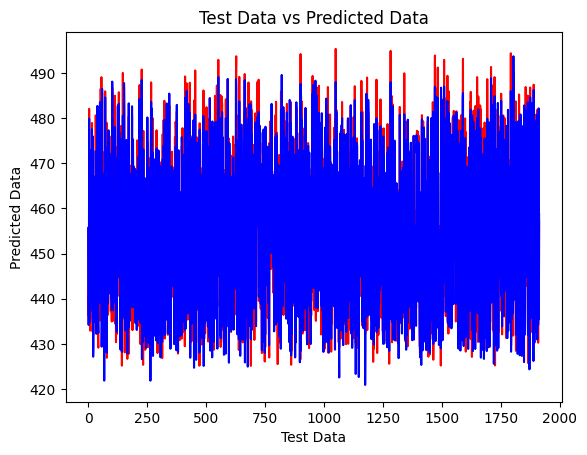

In [46]:
#notNeeded
plt.plot(y_test,color = 'red')
plt.plot(y_pred,color='blue')
plt.title("Test Data vs Predicted Data")
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9301046431962188